Performing Exploratory Data analysis (EDA) on the data file.
The steps would involve:

    1. Import Libraries and Load the Data
    2. Inspect the Data
    3. Handle Missing Values
    4. Check for Duplicate Rows
    5. Data Visualization
    6. Outlier Detection
    7. Feature Engineering
    8. Time Series Data
    9. Save the Cleaned Data
    10. Summarize the findings


About Data:
Data is acquired from survey, Ideally it has 222 columns more comments on the columns are documented on the Excel sheet.
the idea is to understand the possible deciding factors that makes IBT to decide to quit their current IBT position to nonIBT position.
the current paper has proven its hyothesis using COR and CH framework using :structural equation modeling (SEM) and latent moder-
ated structural equation modeling (LMS)

Understanding on how to convert this set up to ML suitable model and prove/disprove hypothesis is the task

In [286]:
import pandas as pd

# file_data=pd.read_csv('wavedata.csv', encoding='utf-8') #fails due to mismatched encoding
file_data = pd.read_csv('wavedata.csv', encoding='latin1') # the change of default encoding removes the error caused earlier, that is due to the presence of unique characters to the text formatting in Latin

Using Latin-1 (ISO-8859-1) encoding for data.
Use Latin-1 for comments if:

The dataset is limited to Western European characters.
As the working data could be with legacy systems or need compatibility with older databases.
Performance or memory efficiency is critical.
For modern and scalable solutions, however, UTF-8 is generally recommended.

But as the document follows the standard of Latin-1 or 'encoding': 'ISO-8859-1' hence this will be default for the project, henceforth.

In [287]:
# Validating the encoding after utf-8 failed.
!pip install chardet

import chardet

# Detect encoding
with open('wavedata.csv', 'rb') as file:
    result = chardet.detect(file.read())
    print(result)


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: C:\Users\reema\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


Result from the above code for documentation:
{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

STEP 1: Import Libraries and Load the Data

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file with the detected encoding
# This is the raw data used for the statistical analysis.
df = pd.read_csv('wavedata.csv', encoding='ISO-8859-1')

# Display the data to verify it loads correctly
print(df.head())


   travfreq  aircrew  empl  jobsat1  jobsat2  jobsat3  roleover1  roleover2  \
0         3      2.0     1        4        4        4          3          4   
1         3      2.0     1        4        4        5          4          4   
2         3      2.0     1        4        3        3          4          4   
3         3      2.0     1        4        4        4          2          3   
4         4      2.0     1        4        4        4          3          4   

   roleover3  workadj1  workadj2  workadj3  workadj4  workadj5  workadj6  \
0          4         5         4         5         3         4         4   
1          4         5         4         4         5         5         5   
2          4         4         4         2         2         4         4   
3          4         4         4         4         4         4         4   
4          3         4         4         4         4         3         3   

   workadj7  workadj8  workadj9  turnover1  turnover2  turnover3  wn

In [289]:
print((df.columns).to_list())
column_count=(df.columns).to_list()
print(df.count())

['travfreq', 'aircrew', 'empl', 'jobsat1', 'jobsat2', 'jobsat3', 'roleover1', 'roleover2', 'roleover3', 'workadj1', 'workadj2', 'workadj3', 'workadj4', 'workadj5', 'workadj6', 'workadj7', 'workadj8', 'workadj9', 'turnover1', 'turnover2', 'turnover3', 'wneglect1', 'wneglect2', 'wneglect3', 'wneglect4', 'wneglect5', 'wneglect6', 'wsitcon1', 'wsitcon2', 'wsitcon3', 'wsitcon4', 'wrclar1', 'wrclar2', 'wrclar3', 'wrclar4', 'wrclar5', 'wrclar6', 'wtimepres1', 'wtimepres2', 'wtimepres3', 'wtimepres4', 'wnovel1', 'wnovel2', 'wnovel3', 'wnovel4', 'wcowinsexphelp 1', 'wcowinsexphelp 2', 'wcowinsexphelp 3', 'wcowinsexphelp 4', 'wroleconflict 1', 'wroleconflict 2', 'wroleconflict 3', 'wintconflictd 1', 'wintconflictd 2', 'wintconflictd 3', 'wintconflictd 4', 'wintconflictf 1', 'wintconflictf 2', 'wintconflictf 3', 'wemotdem 1', 'wemotdem 2', 'wemotdem 3', 'wemotdem 4', 'wemotdem 5', 'wpeopresp1', 'wpeopresp2', 'wpeopresp3', 'wpeopresp4', 'wpeopresp5', 'wallcowexp1', 'wallcowexp2', 'wallcowexp3', 'w

In [290]:
a=['travfreq', 'aircrew', 'empl', 'jobsat1', 'jobsat2', 'jobsat3', 'roleover1', 'roleover2', 'roleover3', 'workadj1', 'workadj2', 'workadj3', 'workadj4', 'workadj5', 'workadj6', 'workadj7', 'workadj8', 'workadj9', 'turnover1', 'turnover2', 'turnover3', 'wneglect1', 'wneglect2', 'wneglect3', 'wneglect4', 'wneglect5', 'wneglect6', 'wsitcon1', 'wsitcon2', 'wsitcon3', 'wsitcon4', 'wrclar1', 'wrclar2', 'wrclar3', 'wrclar4', 'wrclar5', 'wrclar6', 'wtimepres1', 'wtimepres2', 'wtimepres3', 'wtimepres4', 'wnovel1', 'wnovel2', 'wnovel3', 'wnovel4', 'wcowinsexphelp 1', 'wcowinsexphelp 2', 'wcowinsexphelp 3', 'wcowinsexphelp 4', 'wroleconflict 1', 'wroleconflict 2', 'wroleconflict 3', 'wintconflictd 1', 'wintconflictd 2', 'wintconflictd 3', 'wintconflictd 4', 'wintconflictf 1', 'wintconflictf 2', 'wintconflictf 3', 'wemotdem 1', 'wemotdem 2', 'wemotdem 3', 'wemotdem 4', 'wemotdem 5', 'wpeopresp1', 'wpeopresp2', 'wpeopresp3', 'wpeopresp4', 'wpeopresp5', 'wallcowexp1', 'wallcowexp2', 'wallcowexp3', 'wallcowexp4', 'wallcowexp5', 'wallcowexp6', 'wallcowexp7', 'wallcowexp8', 'wallcowexp9', 'wallcowexp10', 'wallcowexp11', 'wallcowexp12', 'cowint', 'cowdep', 'wteams', 'wcom', 'Unnamed: 85', 'fsat1', 'fsat2', 'fsat3', 'fneglect1', 'fneglect2', 'fneglect3', 'fneglect4', 'fneglect5', 'fneglect6', 'fadj1', 'fadj2', 'fadj3', 'fadj4', 'fadj5', 'fadj6', 'fadj7', 'fadj8', 'fadj9', 'wfc1', 'wfc2', 'wfc3', 'wfc4', 'wfc5', 'ftimepres1', 'ftimepres2', 'ftimepres3', 'ftimepres4', 'check2', 'faminstexp1', 'faminstexp2', 'faminstexp3', 'faminstexp4', 'femotdem1', 'femotdem2', 'femotdem3', 'femotdem4', 'froleover1', 'froleover2', 'froleover3', 'froleconf1', 'froleconf2', 'froleconf3', 'fintconfd1', 'fintconfd2', 'fintconfd3', 'fintconfd4', 'fintconff1', 'fintconff2', 'fintconff3', 'famallexp1', 'famallexp2', 'famallexp3', 'famallexp4', 'famallexp5', 'famallexp6', 'famallexp7', 'famallexp8', 'famallexp9', 'famallexp10', 'famallexp11', 'famallexp12', 'burn1', 'burn2', 'burn3', 'burn4', 'burn5', 'burn6', 'burn7', 'burn8', 'burn9', 'burn10', 'burn11', 'burn12', 'burn13', 'burn14', 'burn15', 'burn16', 'burn17', 'burn18', 'burn19', 'burn20', 'burn21', 'supsup1', 'cowsup1', 'parsup1', 'famsup1', 'supsup2', 'cowsup2', 'parsup2', 'famsup2', 'supsup3', 'cowsup3', 'parsup3', 'famsup3', 'supsup4', 'cowsup4', 'parsup4', 'famsup4', 'cogflex1', 'cogflex2', 'cogflex3', 'cogflex4', 'cogflex5', 'cogflex6', 'cogflex7', 'cogflex8', 'cogflex9', 'cogflex10', 'cogflex11', 'cogflex12', 'houswork', 'childwork', 'marstat', 'children', 'whours', 'tenure', 'position', 'education', 'gender', 'age', 'industry', 'otherindustry', 'nationality', 'residence', 'lang', 'feeltravel', 'yearstravel', 'numbertravel', 'daysknowtravel', 'meettravel', 'flytravel', 'countrytravel', 'daystrip', 'reasontrip', 'otherreasontrip', 'weekendtrip']
print(len(a))

222


STEP 2: Inspect the Data

Questions to answer:
    1. Shape:
        Number of rows and columns: Shape of dataset: (579, 222)
    2. Data Types:
        Identify numeric, categorical, and datetime columns.
    3. Missing Values:
        Count and percentage of missing values in each column.
    4. Summary Statistics:
        Get an overview of the data distribution.

In [291]:
# Shape and info
print(f"Shape of dataset: {df.shape}")
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
missing_data = df.isnull().sum()
print("Missing Values:\n", missing_data)

Shape of dataset: (579, 222)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Columns: 222 entries, travfreq to weekendtrip
dtypes: float64(18), int64(187), object(17)
memory usage: 1004.3+ KB
None
         travfreq  aircrew   empl     jobsat1     jobsat2     jobsat3  \
count  579.000000    524.0  579.0  579.000000  579.000000  579.000000   
mean     3.447323      2.0    1.0    4.243523    4.234888    4.217617   
std      0.881513      0.0    0.0    0.834655    0.827778    0.772114   
min      2.000000      2.0    1.0    1.000000    1.000000    1.000000   
25%      3.000000      2.0    1.0    4.000000    4.000000    4.000000   
50%      3.000000      2.0    1.0    4.000000    4.000000    4.000000   
75%      4.000000      2.0    1.0    5.000000    5.000000    5.000000   
max      5.000000      2.0    1.0    5.000000    5.000000    5.000000   

        roleover1   roleover2   roleover3    workadj1    workadj2    workadj3  \
count  579.000000  579.000000  579.00000

In [292]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [293]:
print('The actual count of missing values in the dataset, to get an estimate of which column contains the most missing values')

df[df.columns[df.isnull().any()]].isnull().sum()

The actual count of missing values in the dataset, to get an estimate of which column contains the most missing values


aircrew             55
turnover1            1
turnover2            2
turnover3            3
wneglect1            2
wneglect2            4
wneglect3            1
wneglect4            2
wneglect5            2
wneglect6            3
wpeopresp3           3
wpeopresp4           2
wpeopresp5           3
wteams               1
wcom                 2
houswork             2
childwork            7
whours               2
tenure              15
education            3
industry             1
otherindustry      468
nationality          5
residence            5
lang               108
countrytravel        1
daystrip             2
otherreasontrip    541
dtype: int64

In [294]:
df = df.drop(columns=['otherindustry','lang','otherreasontrip','aircrew'])

In [295]:
print('After deleting columns after discussion')

df[df.columns[df.isnull().any()]].isnull().sum()

After deleting columns after discussion


turnover1         1
turnover2         2
turnover3         3
wneglect1         2
wneglect2         4
wneglect3         1
wneglect4         2
wneglect5         2
wneglect6         3
wpeopresp3        3
wpeopresp4        2
wpeopresp5        3
wteams            1
wcom              2
houswork          2
childwork         7
whours            2
tenure           15
education         3
industry          1
nationality       5
residence         5
countrytravel     1
daystrip          2
dtype: int64

In [296]:
df['tenure'].dtype
df['tenure'] = pd.to_numeric(df['tenure'])
df['tenure'].dtype

dtype('float64')

In [297]:
if df['tenure'].dtype in [float, int]:  # Ensure the column is numeric
    df['tenure'] = df['tenure'].fillna(df['tenure'].mean())
else:
    print("'tenure' is not numeric and cannot be filled with mean.")

In [298]:
print('After imputing missing values of tenure with avg value ')

df[df.columns[df.isnull().any()]].isnull().sum()

After imputing missing values of tenure with avg value 


turnover1        1
turnover2        2
turnover3        3
wneglect1        2
wneglect2        4
wneglect3        1
wneglect4        2
wneglect5        2
wneglect6        3
wpeopresp3       3
wpeopresp4       2
wpeopresp5       3
wteams           1
wcom             2
houswork         2
childwork        7
whours           2
education        3
industry         1
nationality      5
residence        5
countrytravel    1
daystrip         2
dtype: int64

In [299]:
print('The percentatge of missing values in the dataset, to get an estimate of which column contains the most missing values and make a decision on how to fill them')
df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]


The percentatge of missing values in the dataset, to get an estimate of which column contains the most missing values and make a decision on how to fill them


turnover1        0.172712
turnover2        0.345423
turnover3        0.518135
wneglect1        0.345423
wneglect2        0.690846
wneglect3        0.172712
wneglect4        0.345423
wneglect5        0.345423
wneglect6        0.518135
wpeopresp3       0.518135
wpeopresp4       0.345423
wpeopresp5       0.518135
wteams           0.172712
wcom             0.345423
houswork         0.345423
childwork        1.208981
whours           0.345423
education        0.518135
industry         0.172712
nationality      0.863558
residence        0.863558
countrytravel    0.172712
daystrip         0.345423
dtype: float64

Based on the first result:
1. otherreasontrip    : 93%
2. otherindustry      : 80%
3. lang               : 18%
4. aircrew            : 9%
5. tenure             : 2%
6. childwork          : 1%

Are above zero, hence the priority of dealing the columns missing values is documented.

This is now handled and the statistics are different as above.


1. otherreasontrip    : 93%   need details on how to fill the null values
2. otherindustry      : 80%   need to understand if this is important field and if that can be filled with a meaning full value
3. lang               : 18%   need to undertand meaningful value to fill it with
4. aircrew            : 9%    I believe this isnt priority, need confirmation
5. tenure             : 2%    default value? or just drop?
6. childwork          : 1%     need info on the column 



Question to be answered before the next steps:

yearstravel:	how long one has travelled IBT
numbertravel:	not sure
daysknowtravel:	info about travel provided before the scheduled travel
meettravel: number of meetings on IBT
daystrip:	how long each trip avg
reasontrip:	reasons for the ignore
otherreasontrip:	ignore
weekendtrip: weekend trip o not
			

Things to do:

write a proposal
    what do i need for this:
    -understanding how to translate the current model to ML
    -variables to be used
    -interpret latent variables
    -evaluation, y variable, x variable, ML task?

Missing value filling:
-how and which



Data preprocessing:

creating a new column, based on row wise avg of the relevant columns.

The columns transformed are listed below:
1. jobsat1	jobsat2	jobsat3--->  average_jobsat
2. roleover1	roleover2	roleover3 --->  average_roleover
3. workadj1	workadj2	workadj3	workadj4	workadj5	workadj6	workadj7	workadj8	workadj9 --->average_workadj
4. turnover1	turnover2	turnover3 ---> average_turnover
5. wneglect1	wneglect2	wneglect3	wneglect4	wneglect5	wneglect6---> average_wneglect
6.wsitcon1	wsitcon2	wsitcon3	wsitcon4 ---> average_wsitcon
7.wrclar1	wrclar2	wrclar3	wrclar4	wrclar5	wrclar6 ---> average_wrclar
8.wtimepres1	wtimepres2	wtimepres3	wtimepres4 --->average_wtimepres
9. wnovel1	wnovel2	wnovel3	wnovel4 --->average_wnovel
10.wcowinsexphelp 1	wcowinsexphelp 2	wcowinsexphelp 3	wcowinsexphelp 4  --->average_wcowinsexphelp
11.wroleconflict 1	wroleconflict 2	wroleconflict 3--->average_wroleconflict
12.wintconflictd 1	wintconflictd 2	wintconflictd 3	wintconflictd 4-->average_wintconflictd
13. wintconflictf 1	wintconflictf 2	wintconflictf 3 --->average_wintconflictf
14. wemotdem 1	wemotdem 2	wemotdem 3	wemotdem 4	wemotdem 5 --->average_wemotdem
15. wpeopresp1	wpeopresp2	wpeopresp3	wpeopresp4	wpeopresp5 --->average_wpeopresp
16. famallexp11	famallexp2	famallexp3	famallexp4	famallexp5	famallexp6	famallexp7	famallexp8	famallexp9	famallexp10	famallexp11	famallexp12 --->average_famallexp
17. wallcowexp1	wallcowexp2	wallcowexp3	wallcowexp4	wallcowexp5	wallcowexp6	wallcowexp7	wallcowexp8	wallcowexp9	wallcowexp10	wallcowexp11	wallcowexp12 --->average_wallcowexp
18. burn1	burn2	burn3	burn4	burn5	burn6	burn7	burn8	burn9	burn10	burn11	burn12	burn13	burn14	burn15	burn16	burn17	burn18	burn19	burn20	burn21 --->average_burn
19. cogflex1	cogflex2	cogflex3	cogflex4	cogflex5	cogflex6	cogflex7	cogflex8	cogflex9	cogflex10	cogflex11	cogflex12 --->average_cogflex
20. supsup1	cowsup1	parsup1	famsup1	supsup2	cowsup2	parsup2	famsup2	supsup3	cowsup3	parsup3	famsup3	supsup4	cowsup4	parsup4	famsup4 --->average_
21.fsat1	fsat2	fsat3 --->average_fsat
22.fneglect1	fneglect2	fneglect3	fneglect4	fneglect5	fneglect6 --->average_fneglect
23.fadj1	fadj2	fadj3	fadj4	fadj5	fadj6	fadj7	fadj8	fadj9 --->average_fadj
24. wfc1	wfc2	wfc3	wfc4	wfc5 --->average_wfc
25.ftimepres1	ftimepres2	ftimepres3	ftimepres4 --->average_ftimepres
26.faminstexp1	faminstexp2	faminstexp3	faminstexp4 --->average_faminstexp
27.femotdem1	femotdem2	femotdem3	femotdem4--->average_femotdem
28.froleover1	froleover2	froleover3 --->average_froleover
29.froleconf1	froleconf2	froleconf3 --->average_froleconf
30.fintconfd1	fintconfd2	fintconfd3	fintconfd4 --->average_fintconfd
31.fintconff1	fintconff2	fintconff3 --->average_fintconff


In [300]:
df['average_jobsat'] = df[['jobsat1', 'jobsat2', 'jobsat3']].mean(axis=1)

In [301]:
df['average_roleover'] = df[['roleover1', 'roleover2', 'roleover3']].mean(axis=1)

In [302]:
df['average_workadj'] = df[['workadj1',	'workadj2'	,'workadj3'	,'workadj4'	,'workadj5'	,'workadj6'	,'workadj7',	'workadj8',	'workadj9']].mean(axis=1)

In [303]:
df['average_turnover'] = df[['turnover1', 'turnover2', 'turnover3']].mean(axis=1)

In [304]:
df['average_wneglect'] = df[['wneglect1', 'wneglect2', 'wneglect3','wneglect4','wneglect5','wneglect6']].mean(axis=1)

In [305]:
df['average_wsitcon'] = df[['wsitcon1', 'wsitcon2', 'wsitcon3','wsitcon4']].mean(axis=1)

In [306]:
df['average_wrclar'] = df[['wrclar1', 'wrclar2', 'wrclar3','wrclar4','wrclar5','wrclar6']].mean(axis=1)

In [307]:
df['average_wtimepres'] = df[['wtimepres1', 'wtimepres2', 'wtimepres3','wtimepres4']].mean(axis=1)

In [308]:
df['average_wnovel'] = df[['wnovel1', 'wnovel2', 'wnovel3','wnovel4']].mean(axis=1)

In [309]:
df['average_wcowinsexphelp'] = df[['wcowinsexphelp 1', 'wcowinsexphelp 2', 'wcowinsexphelp 3','wcowinsexphelp 4']].mean(axis=1)

In [310]:
df['average_wroleconflict'] = df[['wroleconflict 1', 'wroleconflict 2', 'wroleconflict 3']].mean(axis=1)

In [311]:
df['average_wintconflictd'] = df[['wintconflictd 1', 'wintconflictd 2', 'wintconflictd 3','wintconflictd 4']].mean(axis=1)

In [312]:
df['average_wintconflictf'] = df[['wintconflictf 1', 'wintconflictf 2', 'wintconflictf 3']].mean(axis=1)

In [313]:
df['average_wemotdem'] = df[['wemotdem 1', 'wemotdem 2', 'wemotdem 3','wemotdem 4','wemotdem 5']].mean(axis=1)

In [314]:
df['average_wpeopresp'] = df[['wpeopresp1', 'wpeopresp2', 'wpeopresp3','wpeopresp4','wpeopresp5']].mean(axis=1)

In [315]:
df['average_wallcowexp'] = df[['wallcowexp1'	,'wallcowexp2',	'wallcowexp3'	,'wallcowexp4'	,'wallcowexp5',	'wallcowexp6',	'wallcowexp7',	'wallcowexp8'	,'wallcowexp9'	,'wallcowexp10'	,	'wallcowexp11', 'wallcowexp12']].mean(axis=1)

In [316]:
df['average_famallexp'] = df[['famallexp1'	,'famallexp2',	'famallexp3'	,'famallexp4'	,'famallexp5',	'famallexp6',	'famallexp7',	'famallexp8'	,'famallexp9'	,'famallexp10'	,	'famallexp11','famallexp12']].mean(axis=1)

In [317]:
df['average_burn'] = df[['burn1',	'burn2','burn3'	,'burn4'	,'burn5',	'burn6',	'burn7'	,'burn8'	,'burn9'	,'burn10'	,'burn11',	'burn12',	'burn13'	,'burn14',	'burn15',	'burn16'	,'burn17'	,'burn18',	'burn19',	'burn20',	'burn21']].mean(axis=1)

In [318]:
df['average_cogflex'] = df[['cogflex1',	'cogflex2',	'cogflex3'	,'cogflex4'	,'cogflex5',	'cogflex6',	'cogflex7',	'cogflex8'	,'cogflex9',	'cogflex10',	'cogflex11'	,'cogflex12']].mean(axis=1)

In [319]:
df['average_supsup'] = df[['supsup1',	'supsup2',	'supsup3'	,'supsup4']].mean(axis=1)
df['average_cowsup'] = df[['cowsup1',	'cowsup2',	'cowsup3'	,'cowsup4']].mean(axis=1)
df['average_parsup'] = df[['parsup1',	'parsup2',	'parsup3'	,'parsup4']].mean(axis=1)
df['average_famsup'] = df[['famsup1',	'famsup2',	'famsup3'	,'famsup4']].mean(axis=1)

In [320]:
df['average_fadj'] = df[['fadj1','fadj2','fadj3','fadj4','fadj5','fadj6','fadj7','fadj8','fadj9']].mean(axis=1)


In [321]:
df['average_fsat'] = df[['fsat1',	'fsat2',	'fsat3']].mean(axis=1)
df['average_fneglect'] = df[['fneglect1',	'fneglect2',	'fneglect3'	,'fneglect4','fneglect5','fneglect6']].mean(axis=1)

In [322]:
df['average_wfc'] = df[['wfc1',	'wfc2',	'wfc3'	,'wfc4','wfc5']].mean(axis=1)

In [323]:
df['average_ftimepres'] = df[['ftimepres1',	'ftimepres2',	'ftimepres3','ftimepres4']].mean(axis=1)
df['average_faminstexp'] = df[['faminstexp1',	'faminstexp2',	'faminstexp3'	,'faminstexp4']].mean(axis=1)
df['average_femotdem'] = df[['femotdem1','femotdem2','femotdem3','femotdem4']].mean(axis=1)


In [324]:
df['average_froleover'] = df[['froleover1',	'froleover2',	'froleover3']].mean(axis=1)
df['average_froleconf'] = df[['froleconf1',	'froleconf2',	'froleconf3']].mean(axis=1)
df['average_fintconfd'] = df[['fintconfd1',	'fintconfd2',	'fintconfd3','fintconfd4']].mean(axis=1)
df['average_fintconff'] = df[['fintconff1',	'fintconff2',	'fintconff3']].mean(axis=1)

In [325]:
df.to_csv('output.csv', index=False)

one hot encoding:
As these values are categorical value the data is preprocessed with onehot encoding:


1.empl
2.fulltime/parttime
3.gender

In [326]:
encoded_df = pd.get_dummies(df, columns=['empl','gender'])


In [327]:
encoded_df.to_csv('preprocessed_data.csv', index=False)

Based on the Exploratory data analysis, the following path for the experiments were chosen:

1. Task for ml: Regression
2. First method for model: Randomforest_regression
3. The hypothesis is tested in 3 steps in 3 different notebooks.


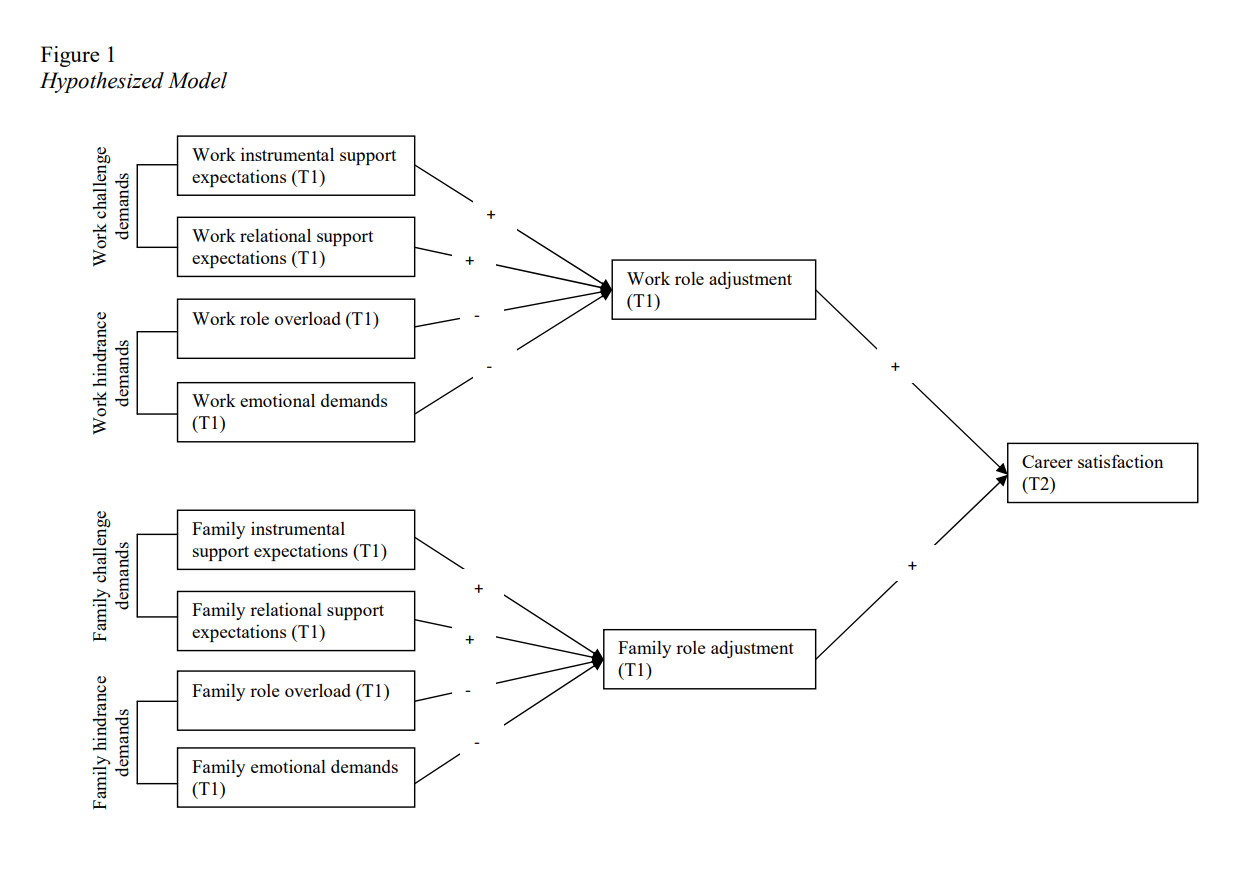

In [328]:
from IPython.display import Image, display

# Display an image
image_path = "../image0.png"
display(Image(filename=image_path))